In [94]:
import pandas as pd
import numpy as np

#Viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


import  textblob
from textblob import TextBlob

import re

from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_excel('C:/Users/tejan/OneDrive/Desktop/Data Science/Data Analystics/Machine Learning/Case Study/5. Bank Reviews/BankReviews.xlsx',
                  usecols = ['Reviews' , 'Stars'])

## Calculating Sentiment analysis using Textblob module

In [28]:
df['sentiment'] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [30]:
df.head()

,Stars,Reviews,sentiment
0,5,"Great job, Wyndham Capital! Each person was pr...",0.533333
1,5,Matthew Richardson is professional and helpful...,0.453333
2,5,We had a past experience with Wyndham Mortgage...,-0.033231
3,5,We have been dealing with Brad Thomka from the...,0.093740
4,5,I can't express how grateful I am for the supp...,0.125000


In [41]:
# Graphical Representation
df.groupby('Stars')['Reviews'].count().reset_index()



,Stars,Reviews
0,1,95
1,5,410


In [47]:
# Positive Reviews Percentage
previews=(df['sentiment']>0).sum()
(previews/len(df["Reviews"]))

0.9227722772277228

In [48]:
# Neagtive Reviews Percentage
nreviews=(df['sentiment']<0).sum()
(nreviews/len(df["Reviews"]))

0.06930693069306931

In [49]:
# Neutral Reviews Percentage
neutral_reviews=(df['sentiment']==0).sum()
(neutral_reviews/len(df["Reviews"]))

0.007920792079207921

In [46]:
# Concatenation of all percentages
review_percent=pd.DataFrame(pd.concat([pd.Series(previews),pd.Series(nreviews),pd.Series(neutral_reviews)],axis=0))
review_percent.set_index(pd.Series(['previews', 'nreviews', 'neutral_reviews']), inplace=True)
review_percent

,0
previews,466
nreviews,35
neutral_reviews,4


## ==============================================

### Most Frequent Words and EDA


In [ ]:
df.isna().sum()  ## no missing values in the dataset

In [ ]:
## Exploratory Analysis

In [ ]:
Banks = df

In [ ]:
df['Word'] = df['Reviews'].apply(lambda x : len(str(x).split()))

df['Pucnhuations'] = df['Reviews'].apply(lambda x : len( [ c for c in str(x) if c in string.punctuation]))

df["count_stopwords"] = df["Reviews"].apply(lambda x: len([c for c in str(x).lower().split() if c in eng_stopwords]))

In [ ]:
# PoS tag 

'Try to do with NLTK '

# pos_family = {
#     'noun' : ['NN','NNS','NNP','NNPS'],
#     'pron' : ['PRP','PRP$','WP','WP$'],
#     'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
#     'adj' :  ['JJ','JJR','JJS'],
#     'adv' : ['RB','RBR','RBS','WRB']
# }

# # function to check and get the part of speech tag count of a words in a given sentence
# def check_pos_tag(x, flag):
#     cnt = 0
#     try:
#         wiki = textblob.TextBlob(x)
#         for tup in wiki.tags:
#             ppo = list(tup)[1]
#             if ppo in pos_family[flag]:
#                 cnt += 1
#     except:
#         pass
#     return cnt

# df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
# df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
# df['adj_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
# df['adv_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
# df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron')) 

In [4]:
bank = df[['Reviews' , 'Stars']]

In [5]:
bank.head()

,Reviews,Stars
0,"Great job, Wyndham Capital! Each person was pr...",5
1,Matthew Richardson is professional and helpful...,5
2,We had a past experience with Wyndham Mortgage...,5
3,We have been dealing with Brad Thomka from the...,5
4,I can't express how grateful I am for the supp...,5


<IPython.core.display.Javascript object>

(378,)
(127,)
(378,)
(127,)


In [7]:
# Cleaning the text variable 

In [52]:
# User defined function to Remove special char, numbers, and making text to lower case
def clean_text(text_col):
    text_col = text_col.lower()
    text_col = text_col.strip()
    text_col = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text_col)
    return(text_col)

In [53]:
stop = set(nltk.corpus.stopwords.words('english'))

In [54]:
# User defined function to remove stop words and for lemmitization

In [55]:
def Pre_process_tejan(text):
#     text = text.apply(lambda x: re.sub("  "," ", x)) # removing double space with single
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
#     text = text.apply(lambda x: str(TextBlob(x).correct())) # Spelling check with Textblob
#     text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    return(text)
    

In [56]:
bank['Reviews'] = bank['Reviews'].apply(lambda x: clean_text(x))
# X_test = X_test.apply(lambda x: clean_text(x))

<ipython-input-56-312e6ebaadc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['Reviews'] = bank['Reviews'].apply(lambda x: clean_text(x))


In [57]:
bank['Reviews']=Pre_process_tejan(bank['Reviews'])
# X_test=Pre_process_tejan(X_test)

<ipython-input-57-5458754347d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['Reviews']=Pre_process_tejan(bank['Reviews'])


In [58]:
# Lemitization using NLTK 
wn=nltk.stem.WordNetLemmatizer()

def lemmatizing(text):
    text=[wn.lemmatize(word) for word in text]
    return text

bank['Reviews']=lemmatizing(bank['Reviews'])
# X_test=lemmatizing(X_test)

<ipython-input-58-786ee3438c17>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['Reviews']=lemmatizing(bank['Reviews'])


In [60]:
bank.head()


,Reviews,Stars
0,great job wyndham capital person professional ...,5
1,matthew richardson professional helpful helped...,5
2,past experience wyndham mortgage would without...,5
3,dealing brad thomka beginning started stressfu...,5
4,cant express grateful support zach provided fa...,5


In [62]:
# COUNT OF MOST FREQUENT WORDS

In [72]:
frequency_words_wo_stop= {}
for data in bank['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower()) # DOing tokeninzation basically breaking it to word level
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1
                



In [86]:
# frequency_words_wo_stop

In [75]:
tokens = nltk.wordpunct_tokenize(data.lower())

In [76]:
from wordcloud import WordCloud ,STOPWORDS

<Figure size 14400x3600 with 0 Axes>

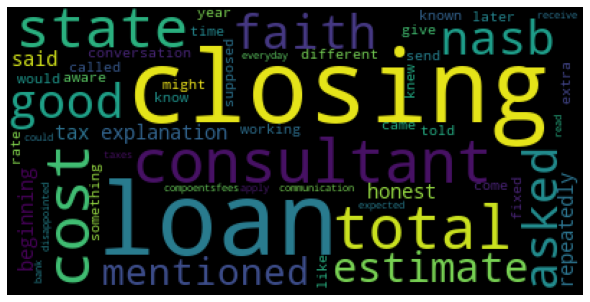

In [88]:
wordcloud = WordCloud(stopwords=[]).generate(' '.join(tokens))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
# plt.imshow(wordcloud)
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [82]:
# Second Way of Word cloud 
comment_words=''
stopwords=set(STOPWORDS)

for x in bank.Reviews:
    
    x=str(x)
    
    tokens=x.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
        
    for y in tokens:
        comment_words=comment_words+y+' '

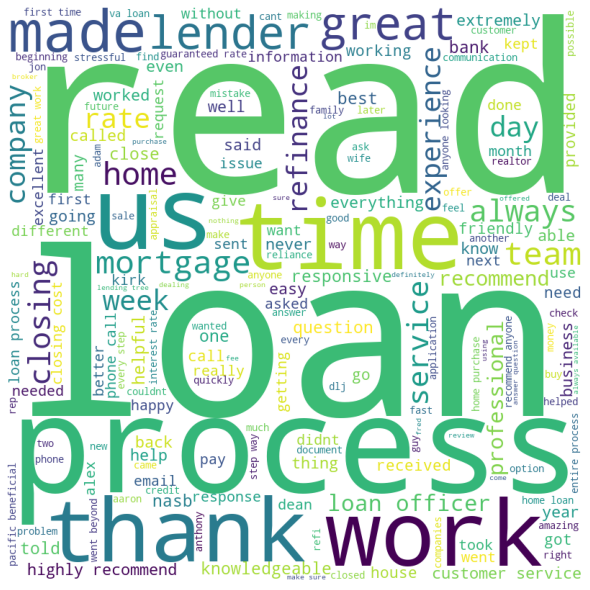

In [91]:
# comment_words

wordcloud=WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# IDENTIFY KEY THEMES OF PROBLEMS USING K-MEANS ALGORITHM

In [102]:
df1 = df[df.sentiment<0]
# df1['Reviews']
# problems=banks.loc[banks.negative>0]['Reviews']
# problems.head()

In [112]:
vectorizer=TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(df1['Reviews'])

In [123]:
## Now, implementing k-means algorithm to get the model so that we can fit into X
k=3
model=KMeans(n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto')


model.fit(X)

C:\Users\tejan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\tejan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=None, precompute_distances='auto')

In [124]:
centroids= model.cluster_centers_.argsort()[:, ::-1]
features=vectorizer.get_feature_names()

In [125]:
for i in range(0,3):
    print('\n\nCluster %d:' % i)
    for ind in centroids[i, :10]:
        print('\t  - %s' % features[ind])



Cluster 0:
	  - loan
	  - best
	  - service
	  - time
	  - rate
	  - home
	  - team
	  - read
	  - working
	  - nasb


Cluster 1:
	  - work
	  - responsive
	  - process
	  - highly
	  - questions
	  - recommend
	  - time
	  - got
	  - home
	  - team


Cluster 2:
	  - process
	  - questions
	  - home
	  - mortgage
	  - loan
	  - recommend
	  - worked
	  - team
	  - entire
	  - time


In [126]:
X=vectorizer.transform(bank.Reviews)
bank['cluster']=model.predict(X)
bank.head()

,Reviews,Stars,cluster
0,great job wyndham capital person professional ...,5,2
1,matthew richardson professional helpful helped...,5,0
2,past experience wyndham mortgage would without...,5,0
3,dealing brad thomka beginning started stressfu...,5,0
4,cant express grateful support zach provided fa...,5,2


In [127]:
bank['cluster'].value_counts()

0    290
2    129
1     86
Name: cluster, dtype: int64

In [133]:
# Now creating the Tf-Idf model
vectorizer=TfidfVectorizer(min_df=0.05, max_df=0.8, max_features=2000)
X = vectorizer.fit_transform(bank.Reviews).toarray()

In [134]:
# # define X and y
# X = bank.Reviews
# y = bank.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, bank.Stars, random_state=1, train_size = 0.75)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<IPython.core.display.Javascript object>

(378, 131)
(127, 131)
(378,)
(127,)


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
log=RandomForestClassifier(max_depth = 6 )
log.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [162]:
# RandomForestClassifier?

In [163]:
from sklearn import metrics

train_accuracy=metrics.accuracy_score(y_train, log.predict(X_train))
test_accuracy=metrics.accuracy_score(y_test, log.predict(X_test))

print("train_accuracy:", train_accuracy)
print("test_accuracy:", test_accuracy)

train_accuracy: 0.9312169312169312
test_accuracy: 0.9133858267716536


In [164]:
# roc_auc_score
train_roc_auc = metrics.roc_auc_score(y_train, log.predict(X_train))
print('Roc Auc Score of training dataset: ', train_roc_auc)

test_roc_auc = metrics.roc_auc_score(y_test, log.predict(X_test))
print('Roc Auc Score of testing dataset: ', test_roc_auc)

Roc Auc Score of training dataset:  0.8142857142857143
Roc Auc Score of testing dataset:  0.78


In [165]:
from sklearn import metrics

# creating a confusion matrix
cm = metrics.confusion_matrix(y_test, log.predict(X_test), [1,5] )
cm

C:\Users\tejan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 5] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[ 14,  11],
       [  0, 102]], dtype=int64)